In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
# data has a few missing values
data =pd.read_csv("../Hackethon/LoanPrediction/LReg/trainLog.csv",na_values=[" ",np.nan,"NA"])
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,5849,0,NaN,Y
1,4583,1508,128.0,N
2,3000,0,66.0,Y
3,2583,2358,120.0,Y
4,6000,0,141.0,Y


In [147]:
#replacing NAN with median of the column
data["LoanAmount"] = data.LoanAmount.fillna(data.LoanAmount.median())
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Status          0
dtype: int64

In [148]:
Var_X = data.iloc[:,0:3]
Var_Y = data.iloc[:,3:]

In [149]:
# Scaling the variables to come on the same scale
Var_X  = (Var_X - Var_X.mean())/Var_X.std()

In [150]:
Var_X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.674995,-0.799062,-0.207803
1,0.154778,-0.200579,-0.096231
2,-0.495700,-0.799062,-0.960913
3,-0.667051,0.136762,-0.207803
4,0.737043,-0.799062,0.085074


In [151]:
# Converting ouput to numeric
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [152]:
Var_Y = labelEncoder.fit_transform(Var_Y.values)

In [153]:
Var_Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [154]:
#adding the intercept
Var_X["intercept"] = 1

In [170]:
X = np.array(Var_X)
Y= np.array(Var_Y)
# beta = np.zeros(4)
beta = np.zeros(X.shape[1])

In [171]:
# ?Check the shapes for a valid matrix multiplication
X.shape , Y.shape , beta.shape

((30L, 4L), (30L,), (4L,))

In [172]:
#calculate the sigmoid function
def sigmoid(z):
    sig =float(1)/(1+np.exp(-z))
    return sig

In [173]:
#find the gradient
def log_gradient(beta, X,Y):
    first = sigmoid(X.dot(beta))- np.squeeze(Y)
    final = first.T.dot(X)
    return final

In [174]:
log_gradient(beta, X,Y)

array([ 1.32492441,  0.96265202, -0.11017729, -4.        ])

In [213]:
# write the cost function
def getCost(X,Y,beta):
    Y = np.squeeze(Y)
    CommSig = sigmoid(X.dot(beta))
    step1  =Y * np.log(CommSig)
    step2 = (1-Y) * np.log(1-CommSig)
    final = -step1 -step2
    return np.mean(final)
    

In [214]:
cc = getCost(X,Y,beta)


In [215]:
cc

0.69314718055994495

In [188]:
#implementation of Gradient descent
def gred_desc(beta_val,X,Y,Alpha,Converge_change =0.001):
    Cost_val = []
    costs = getCost(X,Y,beta_val)
    Cost_val.append(costs)
    change_cost =1
    i=1
    while change_cost>Converge_change and i<5000:
        oldCost = costs
        beta_val = beta_val -(alpha * log_gradient(beta_val,X,Y))
        costs = getCost(X,Y,beta_val)
        Cost_val.append(costs)
        i+=1
    return beta_val, Cost_val




In [189]:
B,C = gred_desc(beta,X,Y,0.001)

In [190]:
C

[0.69314718055994495,
 0.687154577413018,
 0.68203573147785845,
 0.67764651661363895,
 0.67386886338187957,
 0.67060562065686968,
 0.66777649312103571,
 0.66531483062095254,
 0.66316508490126769,
 0.6612807869069518,
 0.65962292999669192,
 0.65815867039670906,
 0.65686027660882651,
 0.65570427520907681,
 0.6546707524892722,
 0.65374278053950452,
 0.65290594332543839,
 0.6521479436142481,
 0.65145827565603964,
 0.65082795164239549,
 0.65024927237171903,
 0.64971563442495728,
 0.64922136762367777,
 0.64876159770123765,
 0.64833213003864565,
 0.64792935105350236,
 0.64755014442369396,
 0.64719181980820184,
 0.64685205211899466,
 0.64652882971868109,
 0.64622041018245768,
 0.64592528248090575,
 0.64564213462102993,
 0.64536982593343473,
 0.64510736331918428,
 0.64485388087510154,
 0.6446086224045483,
 0.64437092639500659,
 0.64414021310640079,
 0.64391597346697049,
 0.64369775951824482,
 0.64348517618856904,
 0.64327787420680194,
 0.64307554399513001,
 0.64287791040318243,
 0.6426847281654

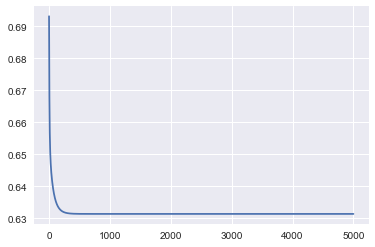

In [197]:
#plotting cost to see the convergence
plt.plot(C)


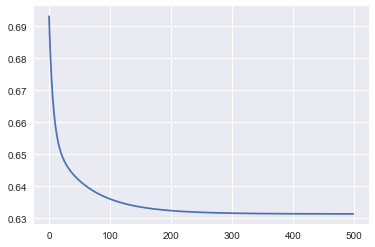

In [198]:
#We see that that cost dropped drastically till itration 300 and reached minima at around 500.
#let's check it in the graph
plt.plot(C[0:500])

In [199]:
#let's code for prediction
def predictV(beta_val,X,val =True):
    predProb = sigmoid(X.dot(beta_val))
    predVal  = np.where(predProb >.5 ,1,0)
    if val:
        return predVal
    return predProb
        
    

In [200]:
predVals = predictV(B,X)

In [205]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [204]:
confusion_matrix(Y,predVals)

array([[ 2,  9],
       [ 1, 18]])

In [206]:
accuracy_score(Y,predVals)

0.66666666666666663

In [207]:
#We got 20 right
np.sum(Y==predVals)

20

In [209]:
#checking against real model
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, Y)
sum(Y == logreg.predict(X))

20

In [217]:
#both the models are performing same on the training data
